# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA Movie Recommendation Predict 2023-2024
Challenge Description
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

...ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?
...it's not just a guess drawn out of the hat. There is an algorithm behind it.

With this context, EA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

What value is achieved through building a functional recommender system?
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

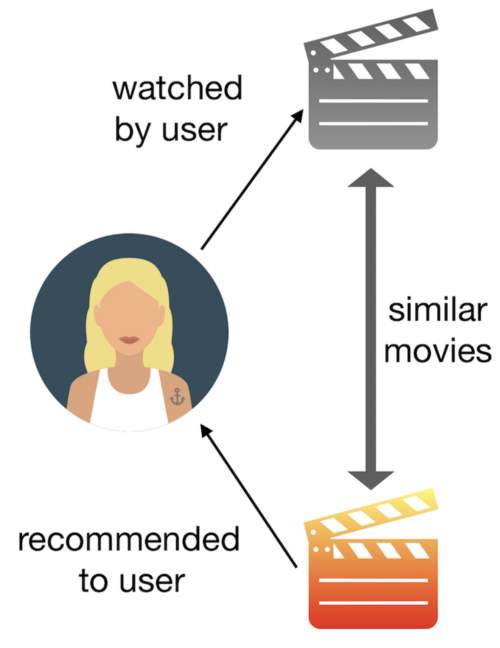


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Import the libraries that will be used throughout your analysis and modelling. |

---

In [6]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade setuptools wheel


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install git+https://github.com/NicolasHug/Surprise.git


  Cloning https://github.com/NicolasHug/Surprise.git to c:\users\happy\appdata\local\temp\pip-req-build-xxe88tzm
  Resolved https://github.com/NicolasHug/Surprise.git to commit 687ed960ef8dac599b3c49f1cf7d6ad1e5bad1f4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/NicolasHug/Surprise.git 'C:\Users\Happy\AppData\Local\Temp\pip-req-build-xxe88tzm'


In [9]:
pip install --upgrade numpy scipy joblib


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-surprise-binary


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-surprise-binary (from versions: none)
ERROR: No matching distribution found for scikit-surprise-binary


In [11]:
#External libraries
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model
import seaborn as sns
import warnings
import cufflinks as cf
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
#Standard Library and Built-in Modules
import joblib
import os
import string
import pickle

C:\Users\Happy\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
|Load the data from the `movies.csv` file into a DataFrame. |

---

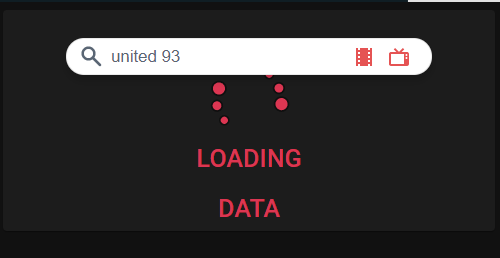

In [12]:
movies = pd.read_csv("resources/data/movies.csv", encoding='utf-8')
rattings = pd.read_csv("resources/data/ratings.csv", encoding='utf-8')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|Perform an in-depth analysis of all the variables in the DataFrame. |

---


In [13]:
rattings.head(20)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [14]:
rattings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [15]:
movies.tail(20)

,movieId,title,genres
62403,209121,Adrenalin: The BMW Touring Car Story (2014),Documentary
62404,209123,Square Roots: The Story of SpongeBob SquarePan...,Documentary
62405,209129,Destination Titan (2011),Documentary
62406,209131,Last Days of the Arctic (2011),Documentary
62407,209133,The Riot and the Dance (2018),(no genres listed)
62408,209135,Jane B. by Agnès V. (1988),Documentary|Fantasy
62409,209137,The Reward's Yours... The Man's Mine (1969),Western
62410,209139,Rimsky-Korsakov (1953),Drama
62411,209141,And They Lived Happily Ever After (1976),Comedy
62412,209143,The Painting (2019),Animation|Documentary


In [16]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [17]:
rattings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [19]:
rattings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [20]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [21]:
rattings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [22]:
rattings.shape

(100004, 4)

In [23]:
movies.shape

(62423, 3)

In [24]:
merged_data = pd.merge(rattings, movies, on='movieId')
merged_data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
5,1,1263,2.0,1260759151,"Deer Hunter, The (1978)",Drama|War
6,1,1287,2.0,1260759187,Ben-Hur (1959),Action|Adventure|Drama
7,1,1293,2.0,1260759148,Gandhi (1982),Drama
8,1,1339,3.5,1260759125,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller
9,1,1343,2.0,1260759131,Cape Fear (1991),Thriller


In [25]:
merged_data.shape

(99561, 6)

C:\Users\Happy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



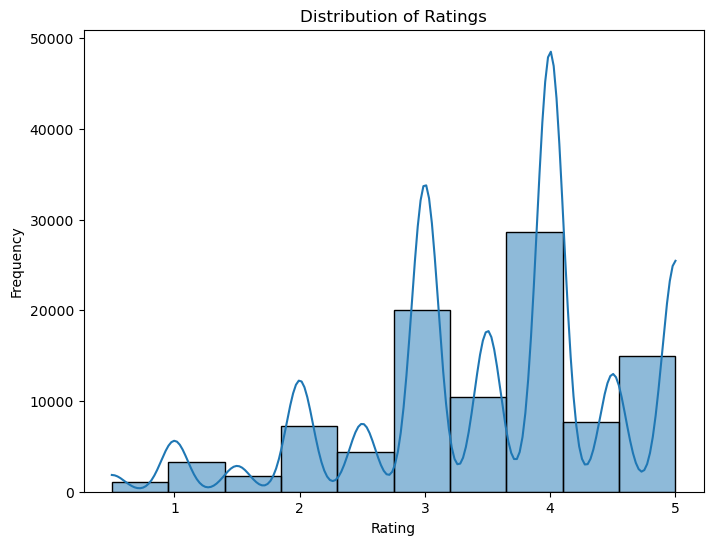

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_data, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


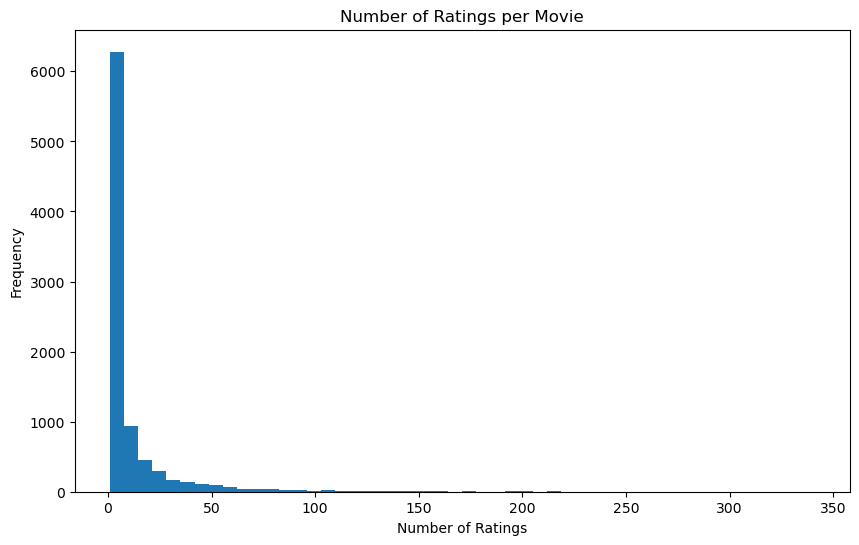

In [27]:
# Number of Ratings per Movie
ratings_per_movie = merged_data.groupby('title')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ratings_per_movie.hist(bins=50, grid=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

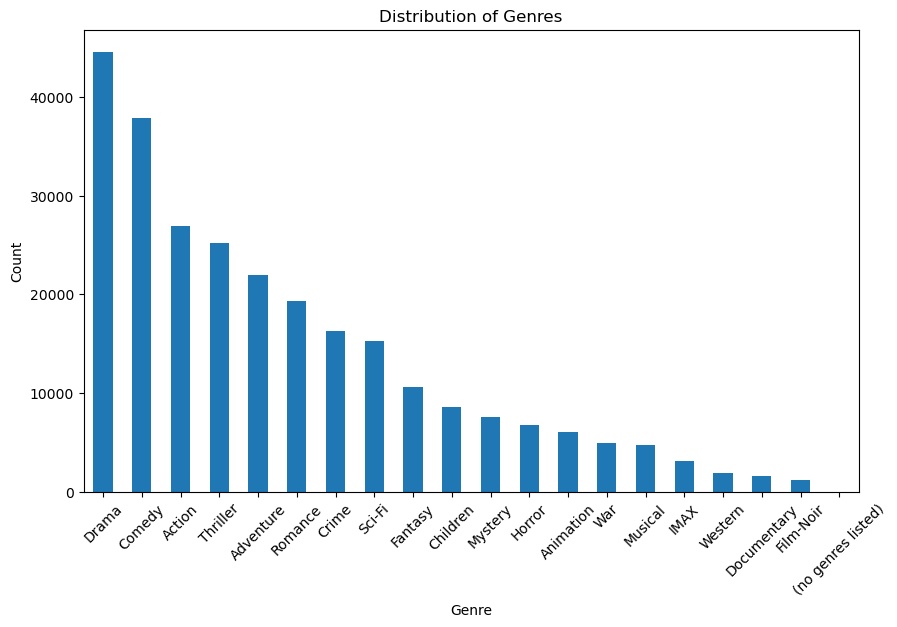

In [28]:
# Distribution of Genres
genres = merged_data['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
genres.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Generate word cloud
movie_titles = movies['title']
movie_titles_text = ' '.join(movie_titles)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Movie Titles')
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object, got 'Series'

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
|Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [30]:
# Extract genres from merged data
genres = merged_data['genres'].str.get_dummies(sep='|')

# Merge one-hot encoded genres with merged data
merged_data = pd.concat([merged_data, genres], axis=1)

# Drop the 'genres' column as it's no longer needed
merged_data.drop(columns=['genres'], inplace=True)


In [31]:
merged_data.head()

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,31,2.5,1260759144,Dangerous Minds (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1029,3.0,1260759179,Dumbo (1941),0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1061,3.0,1260759182,Sleepers (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1129,2.0,1260759185,Escape from New York (1981),0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
merged_data.shape

(99561, 25)

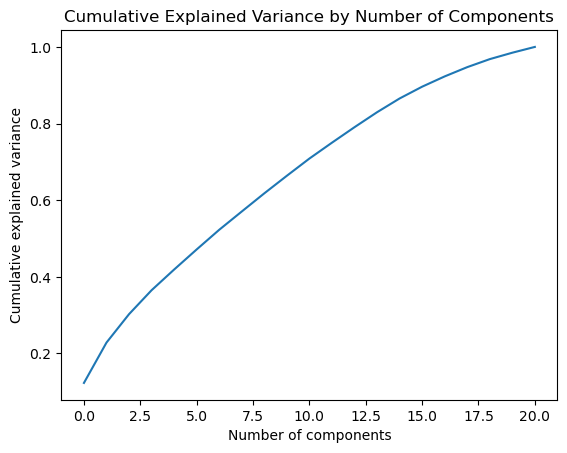

In [33]:
from sklearn.decomposition import PCA
import numpy as np
us_df_numeric = merged_data.drop(columns=['userId', 'movieId', 'rating', 'title'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
us_df_scaled = scaler.fit_transform(us_df_numeric)
pca = PCA()
prin_comp = pca.fit_transform(us_df_scaled)
pca_df = pd.DataFrame(data=prin_comp)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()


In [34]:
variance_threshold = 0.85
pca_85 = PCA(variance_threshold)
pca_transformed = pca_85.fit_transform(us_df_scaled)
explained_variance_ratio_sum = pca_85.explained_variance_ratio_.sum() * 100
print(round(explained_variance_ratio_sum, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

86.5 % of variance explained by 15 components.


In [35]:
pca.explained_variance_ratio_[:3]

array([0.12301904, 0.10529944, 0.07418402])

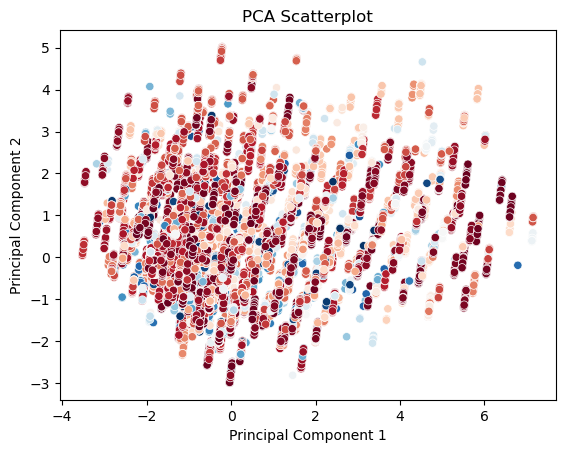

In [36]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                     hue=merged_data["title"],
                     palette='RdBu',
                     legend=False)
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [37]:
merged_data.head()

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,31,2.5,1260759144,Dangerous Minds (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1029,3.0,1260759179,Dumbo (1941),0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1061,3.0,1260759182,Sleepers (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1129,2.0,1260759185,Escape from New York (1981),0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Exclude non-features from data
reg_data = merged_data["title"]

# Set aside response variable (Unscaled!)
reg_response =merged_data["title"]

# Drop response variable from reg_data
reg_data = reg_data.drop(columns=['title'])


In [39]:
reg_data.head(10)

0                            Dangerous Minds (1995)
1                                      Dumbo (1941)
2                                   Sleepers (1996)
3                       Escape from New York (1981)
4    Cinema Paradiso (Nuovo cinema Paradiso) (1989)
5                           Deer Hunter, The (1978)
6                                    Ben-Hur (1959)
7                                     Gandhi (1982)
8            Dracula (Bram Stoker's Dracula) (1992)
9                                  Cape Fear (1991)
Name: title, dtype: object

In [40]:
reg_data.columns()

AttributeError: 'Series' object has no attribute 'columns'

In [41]:
# create new features

In [42]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more models that are able to accurately recomend movies. |

---

In [46]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import GridSearchCV, cross_validate
from surprise.accuracy import rmse

# Load the dataset for collaborative filtering
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(merged_data[['userId', 'movieId', 'rating']], reader)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.005, 0.01, 0.015],
              'reg_all': [0.02, 0.04, 0.06]}

# Perform GridSearchCV with 5-fold cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Get the best parameters and their RMSE score
best_params = gs.best_params['rmse']
best_rmse = gs.best_score['rmse']
print("Best Parameters:", best_params)
print("Best RMSE Score:", best_rmse)

# Initialize the algorithm with the best parameters
best_algo = gs.best_estimator['rmse']

# Evaluate the model using 5-fold cross-validation
cv_results = cross_validate(best_algo, data, measures=['RMSE'], cv=5, verbose=True)

# Get the average RMSE score
avg_rmse = np.mean(cv_results['test_rmse'])
print("Average RMSE Score:", avg_rmse)



Best Parameters: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.06}
Best RMSE Score: 0.876316488240759
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8667  0.8849  0.8818  0.8815  0.8738  0.8777  0.0066  
Fit time          3.34    3.68    3.57    3.46    3.44    3.50    0.12    
Test time         0.17    0.48    0.21    0.24    0.21    0.26    0.11    
Average RMSE Score: 0.8777453751861971


In [ ]:
# create scaler object
scaler = StandardScaler()

# scale the data
X_scaled = scaler.fit_transform(merged_data)

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
|Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic